In [127]:

### Mission of Fortis General Hospital
#Fortis General Hospital is committed to prioritizing patient care in its operations. 
#To achieve this, the hospital closely monitors a variety of key performance indicators (KPIs)
#that can impact patient safety and overall satisfaction. This dataset focuses on three KPIs 
#that are critical to hospital performance:

In [128]:
## 1. Average Licensed Bed Occupancy Rate
# This metric is internally measured and calculated as the average percentage of licensed beds that are occupied by patients.
    

#Average Occupancy Rate = (Number of Patients in Licensed Beds per Day / Number of Licensed Beds) × 100

In [129]:
##2. Staff Responsiveness Top Box Score

#This measure comes from the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) Survey, 
#which gauges patient satisfaction regarding staff responsiveness. Specifically, it calculates the percentage 
#of patients who answered "Always" to two key questions:

#After pressing the call button, how often did you get help as soon as you wanted it?
#How often did you get help with getting to the bathroom or using a bedpan as soon as you wanted it? 
#The formula used is:

#Staff Responsiveness Top Box Score = (Number of "Always" Responses / Total Responses) × 100

In [130]:
## 3.Unassisted Fall Rate per 1,000 Patient Days
# This metric tracks the frequency of patient falls that occur without the assistance of staff. 
# Unassisted falls are defined as incidents where there is no staff member present to assist the patient. 
    
#The measure is calculated as:

#Unassisted Fall Rate = (Number of Patient Falls / Number of Patient Days) × 1000

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [132]:

df = pd.read_csv(r'HealthCare Project.csv' )

df.head(2)

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,Jan-20,96%,2.21,68.34,0.221,0.6834,65
1,Feb-20,96%,1.79,72.75,0.179,0.7275,65


In [133]:
# Step 2: Data Preprocessing
# Convert percentage columns to proper scale (if needed)
percentage_columns = ['Average Licensed Bed Occupancy Rate', 'Unassisted Fall %', 'Staff Responsiveness Domain Top Box Score %']
for column in percentage_columns:
    data[column] = data[column] / 100

In [134]:
# Step 3: Exploratory Data Analysis (EDA)
# Summary statistics
print(data.describe())

       Average Licensed Bed Occupancy Rate  \
count                         6.000000e+01   
mean                          9.621667e-07   
std                           2.840934e-08   
min                           8.100000e-07   
25%                           9.500000e-07   
50%                           9.600000e-07   
75%                           9.800000e-07   
max                           1.010000e-06   

       Unassisted Fall Rate per 1,000 Patient Days  \
count                                    60.000000   
mean                                      2.607833   
std                                       0.500712   
min                                       1.030000   
25%                                       2.310000   
50%                                       2.590000   
75%                                       3.030000   
max                                       3.410000   

       Staff Responsiveness Domain Top Box Score  Unassisted Fall %  \
count                      

In [135]:
# Step 4: Visualizations
# 4.1: Plot trends over time (assuming there's a 'Month' column with date info)
data['Month'] = data['Month'].str[-2:]



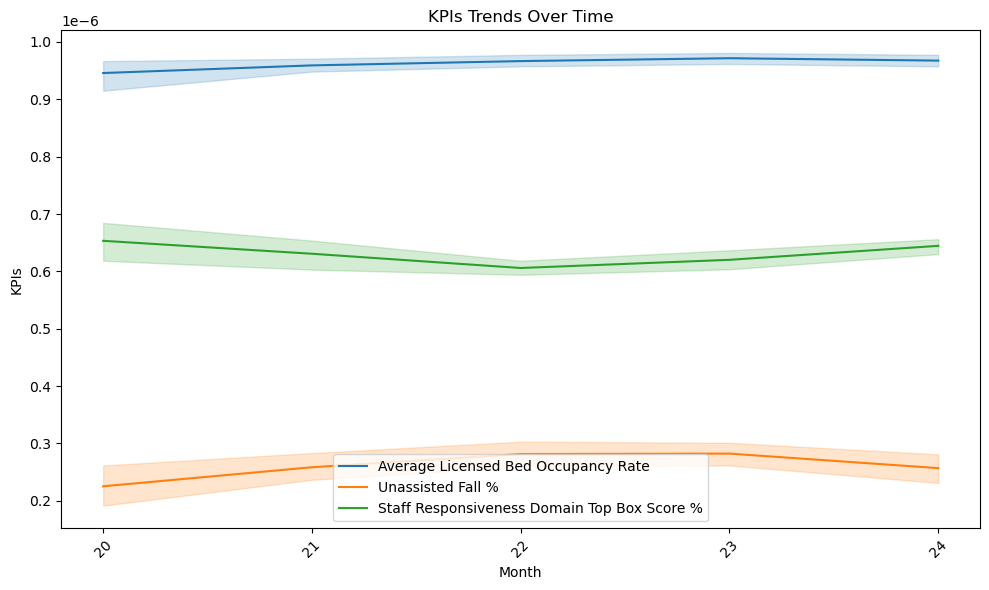

In [136]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Month', y='Average Licensed Bed Occupancy Rate', label='Average Licensed Bed Occupancy Rate')
sns.lineplot(data=data, x='Month', y='Unassisted Fall %', label='Unassisted Fall %')
sns.lineplot(data=data, x='Month', y='Staff Responsiveness Domain Top Box Score %', label='Staff Responsiveness Domain Top Box Score %')
plt.title('KPIs Trends Over Time')
plt.xlabel('Month')
plt.ylabel('KPIs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pearson Correlation Matrix:
                                              Average Licensed Bed Occupancy Rate  \
Average Licensed Bed Occupancy Rate                                     1.000000   
Unassisted Fall %                                                       0.700112   
Staff Responsiveness Domain Top Box Score %                            -0.371821   

                                             Unassisted Fall %  \
Average Licensed Bed Occupancy Rate                   0.700112   
Unassisted Fall %                                     1.000000   
Staff Responsiveness Domain Top Box Score %          -0.791340   

                                             Staff Responsiveness Domain Top Box Score %  
Average Licensed Bed Occupancy Rate                                            -0.371821  
Unassisted Fall %                                                              -0.791340  
Staff Responsiveness Domain Top Box Score %                                     1.000000  
Spear

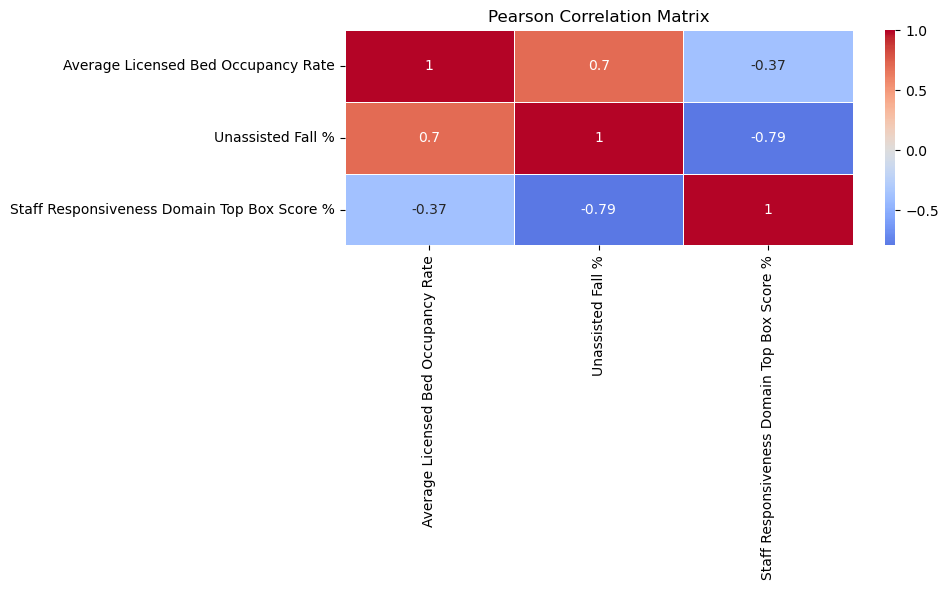

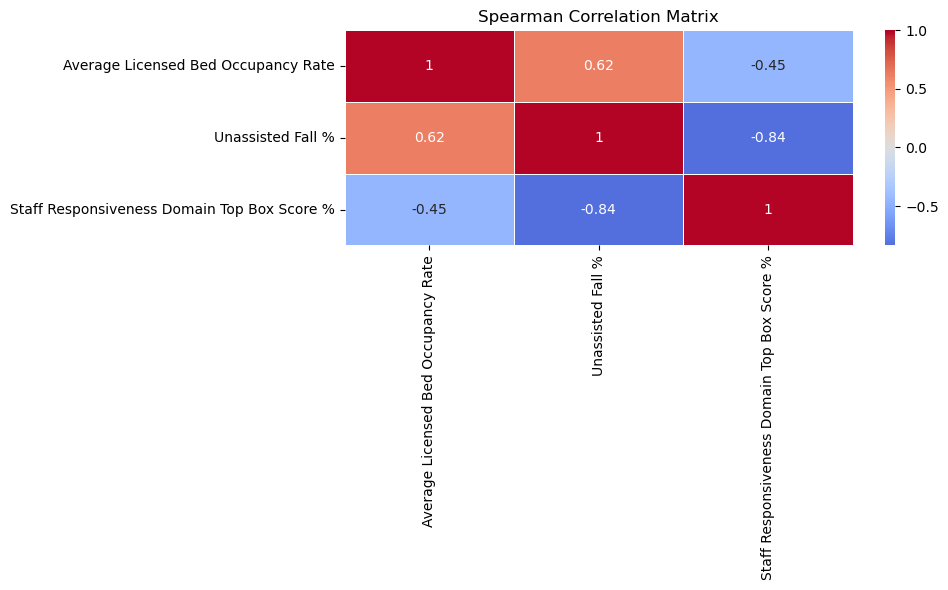

In [137]:
# Step 5: Correlation Analysis

# 5.1: Pearson correlation for linear relationships
pearson_corr_matrix = data[['Average Licensed Bed Occupancy Rate', 'Unassisted Fall %', 'Staff Responsiveness Domain Top Box Score %']].corr(method='pearson')
print("Pearson Correlation Matrix:\n", pearson_corr_matrix)

# 5.2: Spearman correlation for monotonic relationships
spearman_corr_matrix = data[['Average Licensed Bed Occupancy Rate', 'Unassisted Fall %', 'Staff Responsiveness Domain Top Box Score %']].corr(method='spearman')
print("Spearman Correlation Matrix:\n", spearman_corr_matrix)

# 5.3: Visualize the correlation matrix using heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()


In [138]:
import pandas as pd

# Define the concise correlation interpretation table
correlation_strength = {
    'Correlation Value Range': ['1.0', '0.8 to 1.0', '0.5 to 0.8', '0.2 to 0.5', '0 to 0.2',
                                '-0.2 to 0', '-0.5 to -0.2', '-0.8 to -0.5', '-1.0 to -0.8', '-1.0'],
    'Strength': ['Perfect Positive', 'Strong Positive', 'Moderate Positive', 'Weak Positive', 'Very Weak/No Correlation',
                 'Very Weak/Negative Correlation', 'Weak Negative', 'Moderate Negative', 'Strong Negative', 'Perfect Negative']
}

# Create a DataFrame
correlation_strength_df = pd.DataFrame(correlation_strength)

# Display the table
print(correlation_strength_df)


  Correlation Value Range                        Strength
0                     1.0                Perfect Positive
1              0.8 to 1.0                 Strong Positive
2              0.5 to 0.8               Moderate Positive
3              0.2 to 0.5                   Weak Positive
4                0 to 0.2        Very Weak/No Correlation
5               -0.2 to 0  Very Weak/Negative Correlation
6            -0.5 to -0.2                   Weak Negative
7            -0.8 to -0.5               Moderate Negative
8            -1.0 to -0.8                 Strong Negative
9                    -1.0                Perfect Negative
